In [40]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize

np.set_printoptions(precision=3, suppress=True)
np.set_printoptions(legacy='1.13')

beta, alpha = 2,1.5
n_consumer = 10 #number of consumer in market 
sigma_b, sigma_a = 0.2, 0.2 #chosen sigma 

#import previous simulated datasets 
dataset = pd.read_csv("multi_market_data.csv")

## 🧪 Practice 4: Simulating Random Coefficients (Consumer Heterogeneity)

### 🎯 Goal
Simulate individual-level taste variation by drawing random coefficients for consumers. This introduces heterogeneity into the utility model and sets the foundation for computing realistic demand with rich substitution patterns.

---

### ⚙️ Setup

- Number of consumers per market: $R$
- Each consumer $i$ gets a random draw $\nu_i \sim \mathcal{N}(0, 1)$
- Taste coefficients:
  - $\beta_i = \beta + \sigma \cdot \nu_i$

---

### 🧮 Utility per Consumer

For each consumer $i$ and product $j$ in market $t$:

$$
u_{ijt} = \beta_i \cdot x_{jt} - \alpha_i \cdot p_{jt}
$$

(no $\varepsilon_{ijt}$ needed here yet—just deterministic part)

---

### ✅ Tasks

1. Simulate $R$ random coefficients $\beta_i$ and optionally $\alpha_i$
2. For one market, compute $u_{ijt}$ for all consumers $i$ and products $j$
3. Explore how utilities differ across consumers

---

### 📌 Purpose

- Enables heterogeneous substitution across consumers
- Prepares for computing choice probabilities and market shares (Practice 5)
- Core innovation behind BLP: demand derived from integrating over a distribution of preferences

[[-11.673  -7.495  -1.419 ...,  -0.696  -6.283  -6.585]
 [ -9.822  -5.924  -0.796 ...,  -0.337  -5.179  -5.341]
 [ -9.839  -5.932  -0.796 ...,  -0.336  -5.188  -5.349]
 ..., 
 [ -8.752  -4.409   0.197 ...,   0.266  -4.37   -4.305]
 [-10.993  -6.714  -0.978 ...,  -0.431  -5.82   -6.021]
 [-11.056  -6.635  -0.861 ...,  -0.357  -5.821  -5.995]]


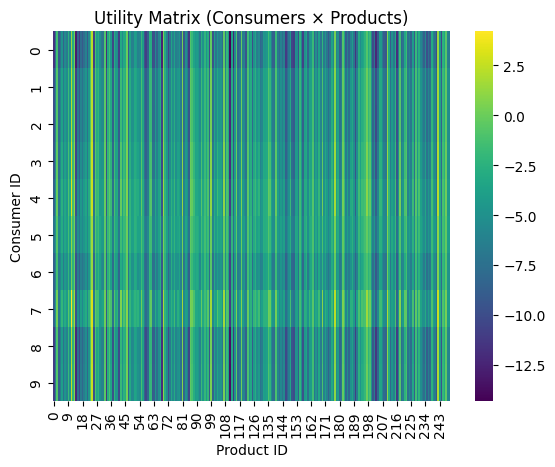

In [41]:
# Simulating consumers 
beta_record = []
alpha_record = []

shock_beta = np.random.normal(0,1, n_consumer)
shock_alpha = np.random.normal(0,1, n_consumer)
beta_i = beta + sigma_b*shock_beta
alpha_i = alpha + sigma_a*shock_alpha
beta_record.append(beta_i)
alpha_record.append(alpha_i)

# building the matrix (utilities of each product for a consumer)
x_j = dataset['x'].values  # shape (J,)
p_j = dataset['p'].values  # shape (J,)
U = np.outer(beta_record, x_j) - np.outer(alpha_record, p_j)

print(U)

#optional: visualization to see product heterogeneity
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(U, cmap="viridis", cbar=True)
plt.title("Utility Matrix (Consumers × Products)")
plt.xlabel("Product ID")
plt.ylabel("Consumer ID")
plt.show()